# Assignment: Evaluating Data from a Form

A client has been testing a [small form](index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the `index.html` page in a browser to take a look at the form.

You have been provided a [dataset of csv records](../../data/form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them. You can explore it in the [assignment notebook](assignment.ipynb).

## Instructions

Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information. 

In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset
path = '../../data/form.csv'
form_df = pd.read_csv(path)
print(form_df)

  birth_month       state   pet
0     January         NaN  Cats
1         JAN          CA  Cats
2        Sept      Hawaii   Dog
3     january          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


### Clean data

Change the months to datetime format
- okay so I actually went down to the bottom and since there is one where it is categorical, I will make another column to display in datetime so that there is one with the readable names and one with useable dates

In [3]:
form_df['birth_month'].dtype

dtype('O')

In [4]:
# okay so the type is object, as expected
# let's replace some data so they are all the same format

form_df['birth_month'] = form_df['birth_month'].replace(['JAN'], 'January')
form_df['birth_month'] = form_df['birth_month'].replace(['Sept'], 'September')
form_df['birth_month'] = form_df['birth_month'].replace(['january'], 'January')

form_df

,birth_month,state,pet
0,January,NaN,Cats
1,January,CA,Cats
2,September,Hawaii,Dog
3,January,AK,Dog
4,July,RI,Cats
5,September,California,Cats
6,April,CA,Dog
7,January,California,Cats
8,November,FL,Dog
9,December,Florida,Cats


In [5]:
form_df.insert(1, 'birth_month_dt', pd.to_datetime(form_df['birth_month'], format = "%B"))
form_df

,birth_month,birth_month_dt,state,pet
0,January,1900-01-01,NaN,Cats
1,January,1900-01-01,CA,Cats
2,September,1900-09-01,Hawaii,Dog
3,January,1900-01-01,AK,Dog
4,July,1900-07-01,RI,Cats
5,September,1900-09-01,California,Cats
6,April,1900-04-01,CA,Dog
7,January,1900-01-01,California,Cats
8,November,1900-11-01,FL,Dog
9,December,1900-12-01,Florida,Cats


In [6]:
form_df['birth_month_dt'].dtype

dtype('<M8[ns]')

So apparently M means datetime but I do not know what everything else means.<br>

Let's do what's suggested and change the NaN in state to the mode of the column, because it is categorical.

In [7]:
form_df['state'].value_counts()

state
CA            2
California    2
Hawaii        1
AK            1
RI            1
FL            1
Florida       1
Name: count, dtype: int64

So the mode is obviously California, but also the ```state``` formats are different (whyyy) so let me make them all the same (I'll make them all abbreviations) too.

In [8]:
# Apparently Hawaii is often abbreviated to AK???
form_df['state'] = form_df['state'].replace(['California'], 'CA')
form_df['state'] = form_df['state'].replace(['Hawaii'], 'AK')
form_df['state'] = form_df['state'].replace(['Florida'], 'FL')

form_df

,birth_month,birth_month_dt,state,pet
0,January,1900-01-01,NaN,Cats
1,January,1900-01-01,CA,Cats
2,September,1900-09-01,AK,Dog
3,January,1900-01-01,AK,Dog
4,July,1900-07-01,RI,Cats
5,September,1900-09-01,CA,Cats
6,April,1900-04-01,CA,Dog
7,January,1900-01-01,CA,Cats
8,November,1900-11-01,FL,Dog
9,December,1900-12-01,FL,Cats


In [9]:
# try the mode thing again
form_df['state'].value_counts()

state
CA    4
AK    2
FL    2
RI    1
Name: count, dtype: int64

In [10]:
form_df['state'].fillna("CA", inplace=True)
form_df

,birth_month,birth_month_dt,state,pet
0,January,1900-01-01,CA,Cats
1,January,1900-01-01,CA,Cats
2,September,1900-09-01,AK,Dog
3,January,1900-01-01,AK,Dog
4,July,1900-07-01,RI,Cats
5,September,1900-09-01,CA,Cats
6,April,1900-04-01,CA,Dog
7,January,1900-01-01,CA,Cats
8,November,1900-11-01,FL,Dog
9,December,1900-12-01,FL,Cats


We could also make life easier if we make a new column with ```0```s for ```Cats``` and ```1```s for ```Dog```.
   - aha! Apparently this is called Label Encoding, which we already covered.

In [11]:
# It's annoying me how Cats is plural, but Dog isn't, so let me change Cats to singular first
form_df['pet'] = form_df['pet'].replace(['Cats'], 'Cat')
form_df

,birth_month,birth_month_dt,state,pet
0,January,1900-01-01,CA,Cat
1,January,1900-01-01,CA,Cat
2,September,1900-09-01,AK,Dog
3,January,1900-01-01,AK,Dog
4,July,1900-07-01,RI,Cat
5,September,1900-09-01,CA,Cat
6,April,1900-04-01,CA,Dog
7,January,1900-01-01,CA,Cat
8,November,1900-11-01,FL,Dog
9,December,1900-12-01,FL,Cat


In [12]:
class_labels = {'Cat':0, 'Dog':1}
form_df['pet_class'] = form_df['pet']
form_df['pet_class'] = form_df['pet_class'].replace(class_labels)
form_df

,birth_month,birth_month_dt,state,pet,pet_class
0,January,1900-01-01,CA,Cat,0
1,January,1900-01-01,CA,Cat,0
2,September,1900-09-01,AK,Dog,1
3,January,1900-01-01,AK,Dog,1
4,July,1900-07-01,RI,Cat,0
5,September,1900-09-01,CA,Cat,0
6,April,1900-04-01,CA,Dog,1
7,January,1900-01-01,CA,Cat,0
8,November,1900-11-01,FL,Dog,1
9,December,1900-12-01,FL,Cat,0


### Actually start plotting

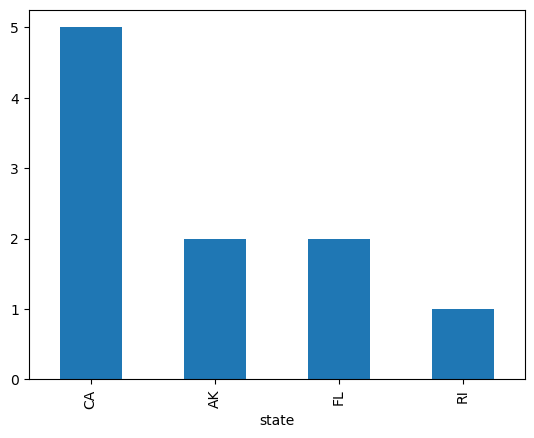

In [13]:
form_df['state'].value_counts().plot(kind='bar');
plt.show()

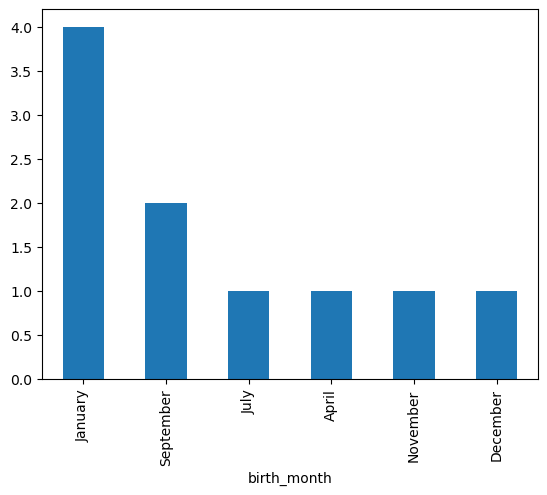

In [14]:
form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()

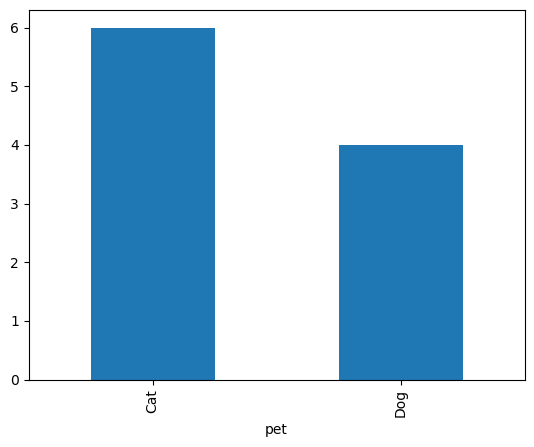

In [15]:
form_df['pet'].value_counts().plot(kind='bar');
plt.show()

Let's go a bit further, plot pet by birth month? I highly doubt there will be correlation, but, you know, practice.

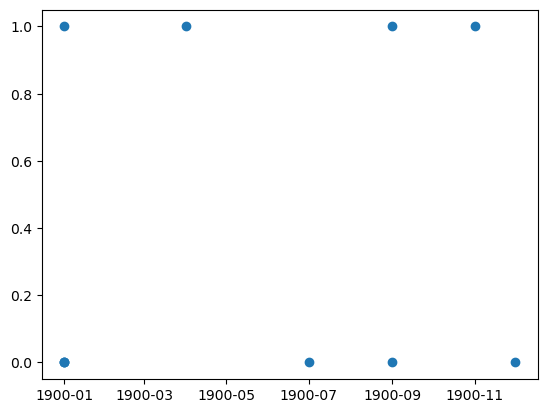

In [16]:
# btw I completely forgot how to plot so we are using the docs
fig, ax = plt.subplots()
ax.scatter(form_df['birth_month_dt'], form_df['pet_class'])
plt.show()

Okay nvm idk how to plot binomial regression. I guess let me plot number of cats and dogs in each state then.
- [this](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py) might be useful

In [17]:
form_df

,birth_month,birth_month_dt,state,pet,pet_class
0,January,1900-01-01,CA,Cat,0
1,January,1900-01-01,CA,Cat,0
2,September,1900-09-01,AK,Dog,1
3,January,1900-01-01,AK,Dog,1
4,July,1900-07-01,RI,Cat,0
5,September,1900-09-01,CA,Cat,0
6,April,1900-04-01,CA,Dog,1
7,January,1900-01-01,CA,Cat,0
8,November,1900-11-01,FL,Dog,1
9,December,1900-12-01,FL,Cat,0


Make a new dataframe that will store information with states as columns, and # of cats in one row, # of dogs in the other.<br>

first test how to count the # of a ```pet``` for a ```state```

In [18]:
form_df['pet'].value_counts()['Cat']

6

In [19]:
#https://www.statology.org/pandas-count-values-in-column-with-condition/
len(form_df[form_df['pet']=='Cat'])

6

In [20]:
#https://www.statology.org/pandas-count-values-in-column-with-condition/
len(form_df[(form_df['pet']=='Cat') & (form_df['state']=="CA")])

4

make the dataframe

In [21]:
# there is probably a better way to do this, but I don't know that way
dict = {"CA": [len(form_df[(form_df['pet']=='Cat') & (form_df['state']=="CA")]), 
               len(form_df[(form_df['pet']=='Dog') & (form_df['state']=="CA")])],
        "AK": [len(form_df[(form_df['pet']=='Cat') & (form_df['state']=="AK")]), 
               len(form_df[(form_df['pet']=='Dog') & (form_df['state']=="AK")])],
        "RI": [len(form_df[(form_df['pet']=='Cat') & (form_df['state']=="RI")]), 
               len(form_df[(form_df['pet']=='Dog') & (form_df['state']=="RI")])],
        "FL": [len(form_df[(form_df['pet']=='Cat') & (form_df['state']=="FL")]), 
               len(form_df[(form_df['pet']=='Dog') & (form_df['state']=="FL")])]}
dict

{'CA': [4, 1], 'AK': [0, 2], 'RI': [1, 0], 'FL': [1, 1]}

In [22]:
# wait I have an idea, I think this is the better way
#https://stackoverflow.com/questions/30280856/populating-a-dictionary-using-two-for-loops-in-python
#https://stackoverflow.com/questions/32072076/find-the-unique-values-in-a-column-and-then-sort-them
d = {}
columns = form_df['state'].unique()
for i in columns:
    d[i] = [len(form_df[(form_df['pet']=='Cat') & (form_df['state']==i)]), 
            len(form_df[(form_df['pet']=='Dog') & (form_df['state']==i)])]
d

{'CA': [4, 1], 'AK': [0, 2], 'RI': [1, 0], 'FL': [1, 1]}

In [23]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
statepet_df = pd.DataFrame(data=d, index=['Cats', 'Dogs'])
statepet_df

,CA,AK,RI,FL
Cats,4,0,1,1
Dogs,1,2,0,1


Make the double bar chart.

In [24]:
# test with the example first
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations

x

array([0, 1, 2])

In [25]:
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

penguin_means.items()

dict_items([('Bill Depth', (18.35, 18.43, 14.98)), ('Bill Length', (38.79, 48.83, 47.5)), ('Flipper Length', (189.95, 195.82, 217.19))])

Bill Depth
(18.35, 18.43, 14.98)
Bill Length
(38.79, 48.83, 47.5)
Flipper Length
(189.95, 195.82, 217.19)


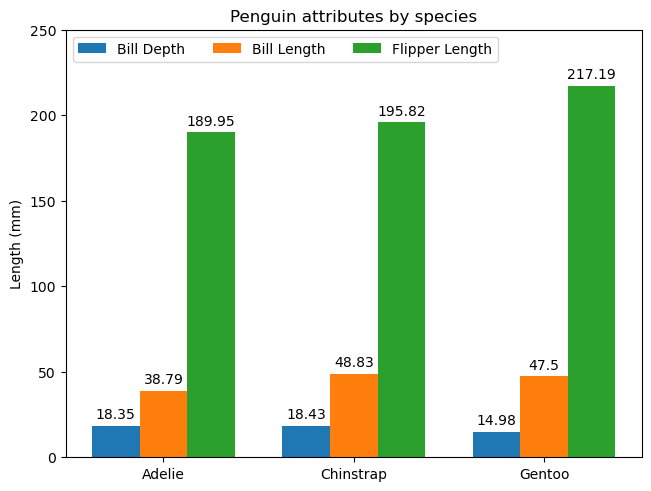

In [77]:
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    print(attribute)
    print(measurement)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

In [27]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html
statepet_df.to_dict('series')
# cool but not what I need

{'CA': Cats    4
 Dogs    1
 Name: CA, dtype: int64,
 'AK': Cats    0
 Dogs    2
 Name: AK, dtype: int64,
 'RI': Cats    1
 Dogs    0
 Name: RI, dtype: int64,
 'FL': Cats    1
 Dogs    1
 Name: FL, dtype: int64}

In [28]:
# wait try items() like they are using
statepet_df.to_dict('series').items()

dict_items([('CA', Cats    4
Dogs    1
Name: CA, dtype: int64), ('AK', Cats    0
Dogs    2
Name: AK, dtype: int64), ('RI', Cats    1
Dogs    0
Name: RI, dtype: int64), ('FL', Cats    1
Dogs    1
Name: FL, dtype: int64)])

In [34]:
# wait actually the other way is the right way?
statepet_df.to_dict('index').items()

dict_items([('Cats', {'CA': 4, 'AK': 0, 'RI': 1, 'FL': 1}), ('Dogs', {'CA': 1, 'AK': 2, 'RI': 0, 'FL': 1})])

In [48]:
statepet_df.loc[statepet_df['FL'] == 1]

,CA,AK,RI,FL
Cats,4,0,1,1
Dogs,1,2,0,1


In [54]:
statepet_df.to_dict('split')

{'index': ['Cats', 'Dogs'],
 'columns': ['CA', 'AK', 'RI', 'FL'],
 'data': [[4, 0, 1, 1], [1, 2, 0, 1]]}

In [52]:
test = statepet_df.to_dict('split')
test['index']

['Cats', 'Dogs']

In [53]:
statepet_df.to_dict('split').items()

dict_items([('index', ['Cats', 'Dogs']), ('columns', ['CA', 'AK', 'RI', 'FL']), ('data', [[4, 0, 1, 1], [1, 2, 0, 1]])])

In [38]:
# need to check columns, I'll just represent them kinda like species
test = statepet_df.columns
test

Index(['CA', 'AK', 'RI', 'FL'], dtype='object')

In [30]:
# to list then?
#https://datatofish.com/convert-pandas-dataframe-to-list/
statepet_df.values.tolist()

for one in statepet_df.values.tolist():
    for i in range(0, 4):
        print(one[i])

# wait wait I'm dumb this is the wrong way, I need lists by column.

4
0
1
1
1
2
0
1


In [31]:
for c in statepet_df.columns:
    for i in range (0, 2):
        print(statepet_df[c][i])
    print("next")

4
1
next
0
2
next
1
0
next
1
1
next


In [32]:
# test this thing
np.arange(len(statepet_df.columns))

array([0, 1, 2, 3])

In [43]:
list(statepet_df.index)

['Cats', 'Dogs']

In [59]:
statepet_df.to_dict('split')['data'][0] + statepet_df.to_dict('split')['data'][1]

[4, 0, 1, 1, 1, 2, 0, 1]

In [85]:
statepet_dict = statepet_df.to_dict('split')
pet_counts = dict.fromkeys(statepet_dict['index'])
i = 0
for key in pet_counts:
    pet_counts[key] = statepet_dict['data'][i]
    i += 1
pet_counts

{'Cats': [4, 0, 1, 1], 'Dogs': [1, 2, 0, 1]}

Cats
[4, 0, 1, 1]
Dogs
[1, 2, 0, 1]


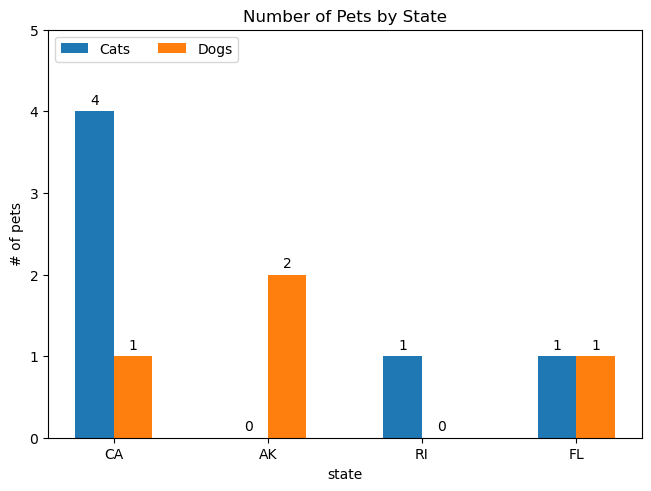

In [87]:
# species is our states
states = list(statepet_df.columns)
# penguin_means is our pet counts, kinda
pet_counts = dict.fromkeys(statepet_dict['index'])
i = 0
for key in pet_counts:
    pet_counts[key] = statepet_dict['data'][i]
    i += 1

x = np.arange(len(states))  # the label locations, based on how many groups there are
width = 0.25  # the width of the bars
multiplier = .5 # this is what changes depending on number of bars to centre bars

fig, ax = plt.subplots(layout='constrained')

for pet, counts, in pet_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, counts, width, label=pet)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    print(pet)
    print(counts)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of pets')
ax.set_xlabel('state')
ax.set_title('Number of Pets by State')
ax.set_xticks(x + width, states)
ax.legend(loc='upper left', ncols=4)

# find limits of data
statepet_values = statepet_df.to_dict('split')['data'][0] + statepet_df.to_dict('split')['data'][1]
ax.set_ylim(min(statepet_values), max(statepet_values)+1)

plt.show()